In [1]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})

line = lambda x, k, b: k*x + b
deltaPercent = lambda a, b: (1 - min(a, b) / max(a, b)) * 100

## 1 Усиление ОУ

![scheme1](scheme1.png)

## 2 АЧХ ОУ

In [2]:
data = np.loadtxt("data2.txt", skiprows=1, delimiter=",").T
f = data[0]
Uout = data[1]
Ua = data[2]

A = 101 * Uout / Ua
Adb = 20 * np.log10(A)

popt, _ = curve_fit(line, np.log10(f), Adb)
print(f"Крутизна = \t{popt[0]:.2f} дБ/декаду")

fp0 = 10 ** ((Adb[0] - 3 - popt[1]) / popt[0])
print(f"fp0 = \t\t {fp0:.2f} Гц")

fT = 10 ** ((1 - popt[1]) / popt[0])
print(f"fT = \t\t {fT:.2e} Гц")

Крутизна = 	-19.55 дБ/декаду
fp0 = 		 13.25 Гц
fT = 		 1.20e+06 Гц


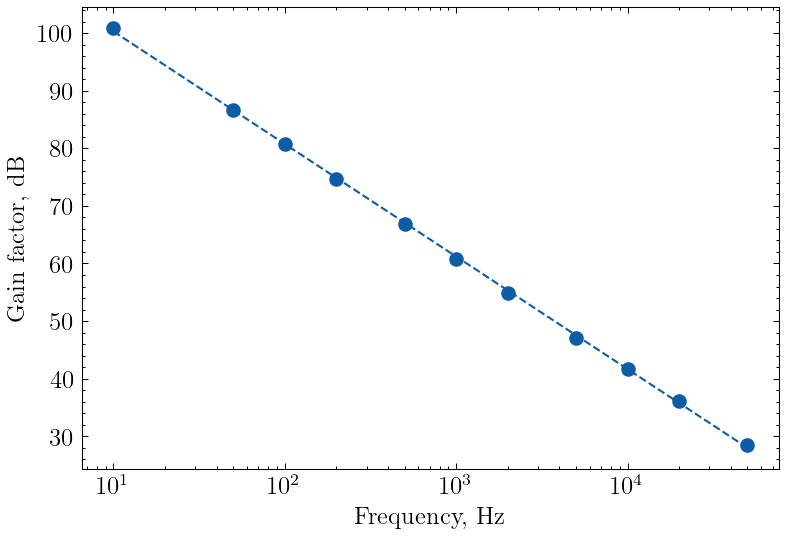

In [3]:
plt.plot(f, Adb, "o")
plt.plot(f, line(np.log10(f), *popt), "--", color="C0")
plt.xscale("log")

plt.xlabel("Frequency, Hz")
plt.ylabel("Gain factor, dB")

plt.show()

## 3 Неинвертирующий усилитель

In [4]:
R1 = 1e3 # Ohm
R2 = 1e5 # Ohm

Uout_dc = 0.015 # V
Uos = Uout_dc / (1 + R2 / R1)
print(f"Входное напряжение сдвига Uos \t{Uos:.2e} В")

Входное напряжение сдвига Uos 	1.49e-04 В


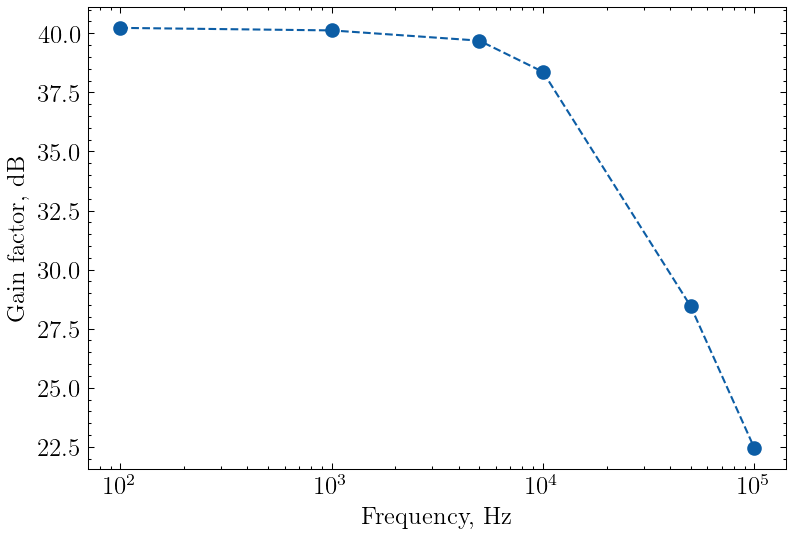

In [5]:
data = np.loadtxt("data3.txt", skiprows=1, delimiter=",").T
f = data[0]
Uin = data[1]
Uout = data[2]

A = Uout / Uin
Adb = 20 * np.log10(A)

plt.plot(f, Adb, "--o")
plt.xscale("log")

plt.xlabel("Frequency, Hz")
plt.ylabel("Gain factor, dB")

plt.show()

In [6]:
Fp = None
for i in range(len(f) - 1):
    if ((Adb[0] - 3) < Adb[i]) and ((Adb[0] - 3) >= Adb[i+1]):
        k = (Adb[i] - Adb[i+1]) / (f[i] - f[i+1])
        b = Adb[i] - k*f[i]
        Fp = ((Adb[0] - 3) - b) / k
        break
print(f"Граничная частота Fp \t\t\t{Fp:.2e} Гц")
        
beta = R1 / (R1 + R2)
K0 = 1 / beta
print(f"Расхождение между A(f_низк) и K0 \t{deltaPercent(A[0], K0):.2f} %")
print(f"Расхождение между beta*fT и Fp \t\t{deltaPercent(Fp, beta*fT):.2f} %")

Граничная частота Fp 			1.46e+04 Гц
Расхождение между A(f_низк) и K0 	1.64 %
Расхождение между beta*fT и Fp 		18.47 %


In [8]:
# п. 5
f = 2e3 # Hz
Umax = 10.77 # V
# Дальше у сигнала появляется характерная "полка"

In [10]:
# п. 6
Fp = 2.22e6 # Hz (A = 1/sqrt(2))
Umax = .55 # V
Um_out = 3e6 / (2*3.1415 * 1e6) # V
print(f"Расхождение между Umax и Um_out \t{deltaPercent(Umax, Um_out):.2f} %")

Расхождение между Umax и Um_out 	13.19 %


## 8 Интегратор

### АЧХ интегратора

![8-afc](8-afc.bmp)

### Интегрирование сигнала

![8-square-integral](8-square-integral.bmp)

## 9 Дифференциатор

### АЧХ дифференциатора

![9-afc](9-afc.bmp)

### Дифференцирование сигнала

![9-triangle-diff](9-triangle-diff.bmp)

## 14 Триггер Шмидта

### Uref = 0, Umax = 1 В (амплитуда синуса)

![14-shmidt-ref0-sine1](14-shmidt-ref0-sine1.bmp)

### Uref = 4 В, Umax = 5 В (амплитуда синуса)

![14-shmidt-ref4-sine5](14-shmidt-ref4-sine5.bmp)

## 15 Самовозбуждающийся мультивибратор

![15-multivibrator](15-multivibrator.bmp)